In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import h5py
from readgadget import readsnap
import yt

%run  guideclass.ipynb

In [2]:
output_dir = '/home/lorenzong/Desktop/simba_cgm/filtered_snaps'

In [3]:
sb = simba('PC39BP4')
snap = 129
cs = sb.get_caesar(f'{snap:03}')
a = cs.simulation.scale_factor
z = sb.get_redshifts()

yt : [INFO     ] 2024-07-18 17:08:45,688 Opening /media/lorenzong/Data1/simba_hig_res/m25n512_129.hdf5
yt : [INFO     ] 2024-07-18 17:08:45,939 Found 263961 halos
yt : [INFO     ] 2024-07-18 17:08:46,108 Found 5290 galaxies


In [4]:
sim_path = sb.get_sim_file(f'{snap:03}') #path to the snapshot

In [37]:
halogals_ind = np.asarray([i.galaxy_index_list for i in cs.halos if i.masses['total']>0.8e14])[0] #index of galaxies in the biggest halo
halogals_ind = halogals_ind[np.asarray([i.GroupID for i in cs.galaxies if i.masses['stellar']>5e10])] #index of most massive galaxies in the biggest halo
galmass = [i.masses['stellar'] for i in cs.galaxies if i.masses['stellar']>5e10] #masses of those galaxies
galpos  = [i.pos for i in cs.galaxies if i.masses['stellar']>5e10]  #position of those galaxies
Ms      = np.asarray([i.masses['stellar'] for i in cs.galaxies])[halogals_ind]
print(Ms[0])
hidx = np.asarray([i.GroupID for i in cs.halos if i.masses['total']>0.8e14])

2518283190272.0


In [39]:
#Ms      = np.asarray([i.masses['stellar'] for i in cs.galaxies])[halogals_ind]
print(np.log10(Ms[0]))
Mhalo      = np.asarray([i.halo.masses['total'] for i in cs.galaxies])[halogals_ind]
print(np.log10(Mhalo[0]))

12.401104566541095
13.93634232076757


In [30]:
# #now we have the indexes we need, so let's go to the particles
# run_search_part = True
# verbose = 1
# overwrite = True
# selection = 'galaxy'

# snap_idx = np.where(sb.snaps == str(snap))[0][0]
# print("snap:",snap,"| z = ", z[snap_idx])

# ds = sb.get_sim_file(snap)
# print("ds:", ds)

# out_folder = '%s/snap_%s'%(output_dir,snap)
# if not os.path.exists(out_folder): os.mkdir(out_folder) 


# if selection=='galaxy': oidx=cs.galaxies.GroupID#oidx=halogals_ind[:2]
# elif selection == 'halo': oidx=hidx
# else: raise ValueError('Invalid object type selection')

# if run_search_part==False:
#     print('Ignore = True: no particle file filtered')
    
# elif run_search_part==True:
#     #ignore_fields = ['GrackleHI', 'GrackleHII', 'GrackleHM', 'GrackleHeI', 'GrackleHeII', 'GrackleHeIII', 'ID_Generations', 'ParticleIDs', 'Potential', 'SmoothingLength'] 
#     ignore_fields = []
#     ## ---- write datasets
#     with h5py.File(ds, 'r') as input_file:
    
#         header = input_file['Header']# .attrs
#         print("Header:", dict(header.attrs))
#         ## If not copying dark matter, set particle counts to zero
#         header.attrs['NumPart_Total'][1] = 0
#         header.attrs['NumPart_ThisFile'][1] = 0
        
    
#         # for ptype in ['PartType0','PartType1','PartType4','PartType5']:
#         for ptype in ['PartType0', 'PartType1', 'PartType4','PartType5']:
#             print(ptype)
    
#             pidx = int(ptype[8:])   # get particle type index
    
#             if ptype in input_file:  # check particle type present
#                 for k in input_file[ptype]:   # loop through fields
            
#                     if k in ignore_fields:
#                         if verbose > 1: print(k,'skipped...')
#                         continue
            
#                     if verbose > 0: print(ptype,k)
            
#                     # load a given field (the bottleneck)
#                     temp_dset = input_file[ptype][k][:]
#                     if verbose > 1: print(temp_dset.shape)
    
            
#                     for obj in oidx:
    
#                         output = '{}/subset_{:06.0f}.h5'.format(out_folder,obj)
    
#                         if selection == 'galaxy': _o = cs.galaxies[obj]
#                         if selection == 'halo': _o = cs.halos[obj]
                
#                         if ptype == 'PartType0': 
#                             plist = _o.glist
#                             print('Plist type: ', type(plist))
#                         elif ptype == 'PartType4': 
#                             plist = _o.slist
#                         elif ptype == 'PartType1': plist = np.zeros(len(_o.slist)) #_o.dmlist
#                         elif ptype == 'PartType5': plist = _o.bhlist
#                         else: 
#                             if verbose > 0: print('No compatible particle type specified')
#                             continue
                
#                         num_particles = len(plist)
#                         #print(f"Object ID: {obj}, Particle Type: {ptype}, Number of particles: {num_particles}")
                
     
#                         ## write to file
#                         with h5py.File(output, 'a') as output_file:
            
#                             ## create header if it doesn't exist
#                             if 'Header' not in output_file:
#                                 output_file.copy(header, 'Header')
            
#                             if ptype not in output_file:
#                                 output_file.create_group(ptype)
            
                    
#                             if '%s/%s'%(ptype,k) in output_file:
#                                 if verbose > 1: print("dataset already exists. replacing...")
#                                 del output_file[ptype][k]
            
#                             output_file[ptype][k] = temp_dset[plist]
                    
#                             temp = output_file['Header'].attrs['NumPart_ThisFile']
#                             temp[pidx] = len(plist)
#                             output_file['Header'].attrs['NumPart_ThisFile'] = temp
                    
#                             temp = output_file['Header'].attrs['NumPart_Total']
#                             temp[pidx] = len(plist)
#                             output_file['Header'].attrs['NumPart_Total'] = temp

#                             output_file['Header'].attrs['BoxSize'] = 1
                            
#                             header = output_file['Header']
#                             #print("Header:", dict(header.attrs))
#     print('Finished with particle filters')

In [8]:
def copy_skeleton(src_filename, dst_filename):
    with h5py.File(src_filename, 'r') as src_file:
        with h5py.File(dst_filename, 'w') as dst_file:
            def copy_structure(name, obj):
                if isinstance(obj, h5py.Group):
                    dst_file.create_group(name)
                elif isinstance(obj, h5py.Dataset):
                    # Create an empty dataset with the same shape and dtype
                    dst_file.create_dataset(name, shape=obj.shape, dtype=obj.dtype)
                # Copy attributes if any
                for key, value in obj.attrs.items():
                    dst_file[name].attrs[key] = value

            src_file.visititems(copy_structure)


run_search_part = True
verbose = 0
overwrite = True
selection = 'halo'

snap_idx = np.where(sb.snaps == str(snap))[0][0]
print("snap:", snap, "| z = ", z[snap_idx])

ds = sb.get_sim_file(snap)
print("ds:", ds)

out_folder = f'{output_dir}/snap_{snap}'
if not os.path.exists(out_folder):
    os.mkdir(out_folder)

if selection == 'galaxy':
    oidx = halogals_ind
elif selection == 'halo':
    oidx = hidx
else:
    raise ValueError('Invalid object type selection')

if not run_search_part:
    print('Ignore = True: no particle file filtered')
else:
    ignore_fields = []  # Add fields to ignore if necessary
    with h5py.File(ds, 'r') as input_file:
        header = input_file['Header']
        print("Header:", dict(header.attrs))
        print(dict(input_file['PartType0'].attrs))

        # for obj in oidx:
        #     output = f'{out_folder}/subset_{obj:06.0f}_halo.h5'
        #     copy_skeleton(ds, output)
        #     with h5py.File(output, 'a') as output_file:
        #         #input_file.copy('Header', output_file)

        #         for ptype in ['PartType0', 'PartType1', 'PartType4', 'PartType5']:
        #             if ptype in input_file:  # check if particle type is present
        #                 if verbose > 0:
        #                     print('Processing:', ptype)

        #                 if selection == 'galaxy':
        #                     _o = cs.galaxies[obj]
        #                 if selection == 'halo':
        #                     _o = cs.halos[obj]

        #                 if ptype == 'PartType0':
        #                     plist = _o.glist
        #                 elif ptype == 'PartType4':
        #                     plist = _o.slist
        #                 elif ptype == 'PartType1':
        #                     plist = _o.glist
        #                 elif ptype == 'PartType5':
        #                     plist = _o.bhlist
        #                 else:
        #                     if verbose > 0:
        #                         print('No compatible particle type specified')
        #                     continue

        #                 for k in input_file[ptype]:
        #                     if k in ignore_fields:
        #                         if verbose > 1:
        #                             print(k, 'skipped...')
        #                         continue

        #                     if verbose > 0:
        #                         print(ptype, k)

        #                     # Extract and filter the dataset
        #                     temp_dset = input_file[ptype][k][:]
        #                     if verbose > 1:
        #                         print(temp_dset.shape)
        #                     #print(input_file[ptype][k])
        #                     #print(plist)
        #                     #input_file.copy(input_file[ptype][k][np.sort(plist)], output_file)

        #                     filtered_dset = temp_dset[plist]

        #                     del output_file[ptype][k]
        #                     output_file[ptype][k] = filtered_dset

        #                 # Update header information for the number of particles
        #                 temp = output_file['Header'].attrs['NumPart_ThisFile']
        #                 temp[int(ptype[8:])] = len(plist)
        #                 output_file['Header'].attrs['NumPart_ThisFile'] = temp

        #                 temp = output_file['Header'].attrs['NumPart_Total']
        #                 temp[int(ptype[8:])] = len(plist)
        #                 output_file['Header'].attrs['NumPart_Total'] = temp
        #                 #output_file['Header'].attrs['BoxSize'] = 1.

        #                 if verbose > 0:
        #                     print("Updated Header:", dict(output_file['Header'].attrs))

        # print('Finished with particle filters')

snap: 129 | z =  0.4057579847053532
ds: /media/lorenzong/Data1/simba_hig_res/snap_m25n512_129.hdf5
Header: {'BoxSize': 25000.0, 'Flag_Cooling': 1, 'Flag_DoublePrecision': 0, 'Flag_Feedback': 1, 'Flag_IC_Info': 3, 'Flag_Metals': 11, 'Flag_Sfr': 1, 'Flag_StellarAge': 1, 'HubbleParam': 0.68, 'MassTable': array([0., 0., 0., 0., 0., 0.]), 'NumFilesPerSnapshot': 1, 'NumPart_ThisFile': array([124183189, 134217728,         0,         0,  10085517,      1248],
      dtype=uint32), 'NumPart_Total': array([124183189, 134217728,         0,         0,  10085517,      1248],
      dtype=uint32), 'NumPart_Total_HighWord': array([0, 0, 0, 0, 0, 0], dtype=uint32), 'Omega0': 0.3, 'OmegaLambda': 0.7, 'Redshift': 0.4057579856290421, 'Time': 0.7113599995325829}
{}


In [7]:
ds = yt.load('/home/lorenzong/Desktop/simba_cgm/filtered_snaps/snap_129/subset_000000_halo.h5')
#print(ds.field_list)
p = yt.ProjectionPlot(ds, "x", ("PartType4", "Dust_Masses"))
p.pan_rel((0.109,0.237))
#v, c = ds.find_max(("PartType0", "Masses"))
#p.set_center((c[0], c[1]))
p.zoom(40)
#gsfr = readsnap('/home/lorenzong/Desktop/simba_cgm/filtered_snaps/snap_129/subset_000000.h5','sfr','gas',units=1)
p.show()

yt : [INFO     ] 2024-07-18 17:09:44,602 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-07-18 17:09:44,603 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-07-18 17:09:44,627 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-07-18 17:09:44,627 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-18 17:09:44,628 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-18 17:09:44,628 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-07-18 17:09:44,629 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-07-18 17:09:44,629 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-07-18 17:09:44,629 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-07-18 17:09:44,629 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-07-18 17:09:44,629 Parameters: omega_radiation     

TypeError: ParticlePlot() missing 1 required positional argument: 'y_field'

yt : [INFO     ] 2024-07-18 16:35:26,950 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-07-18 16:35:26,950 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-07-18 16:35:26,951 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-07-18 16:35:26,951 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-07-18 16:35:26,952 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



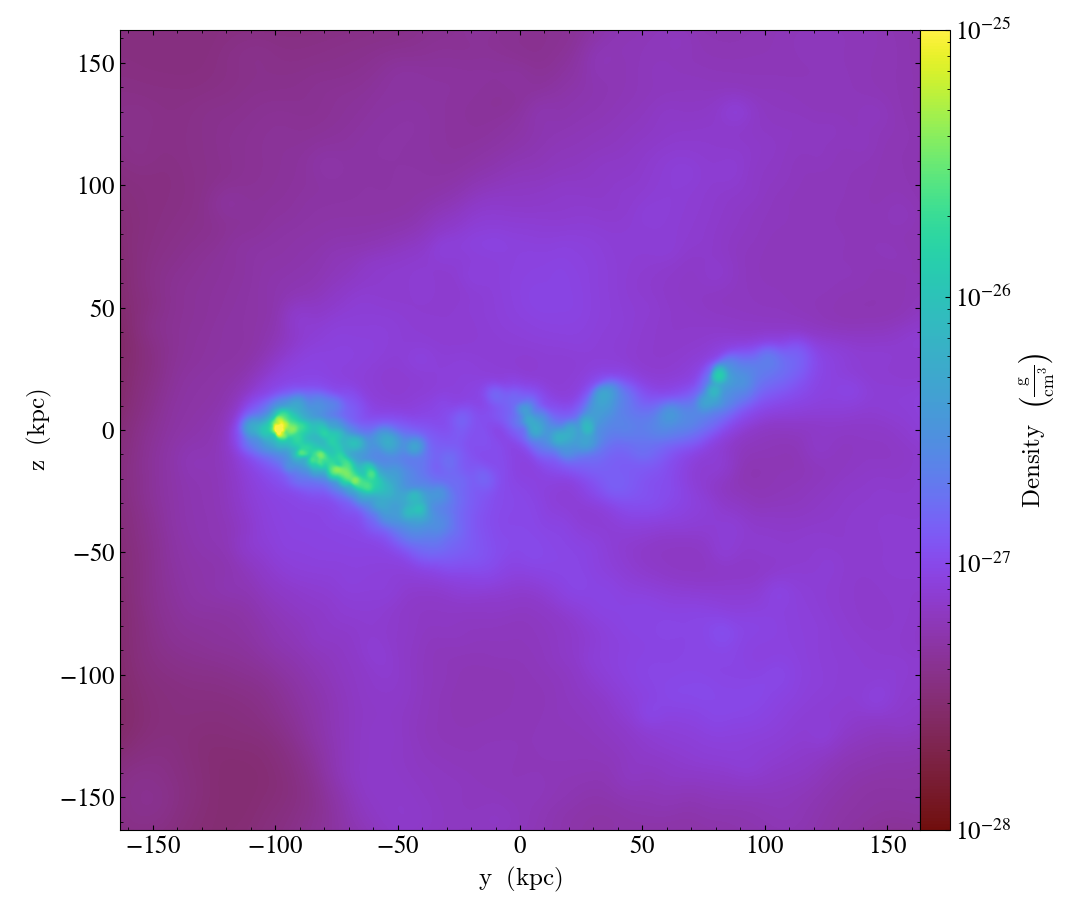

In [113]:
slc = yt.SlicePlot(ds, "x", ("gas", "density"))
slc.pan_rel((0.105,0.235))
#slc.pan((4000*kpc, 6000*kpc))
slc.zoom(80)
slc.set_zlim(("gas", "density"), zmin=(1e-28, "g/cm**3"), zmax=(1e-25, "g/cm**3"))
slc.show()

yt : [INFO     ] 2024-07-19 08:03:16,389 max value is 7.61909e-21 at 12207.6064453125000000 15227.7714843750000000 18432.9628906250000000
yt : [INFO     ] 2024-07-19 08:03:16,390 xlim = 2727.771484 27727.771484
yt : [INFO     ] 2024-07-19 08:03:16,390 ylim = 5932.962891 30932.962891
yt : [INFO     ] 2024-07-19 08:03:16,390 xlim = 2727.771484 27727.771484
yt : [INFO     ] 2024-07-19 08:03:16,391 ylim = 5932.962891 30932.962891
yt : [INFO     ] 2024-07-19 08:03:16,392 Splatting (('PartType0', 'Masses')) onto a 800 by 800 mesh using method 'ngp'



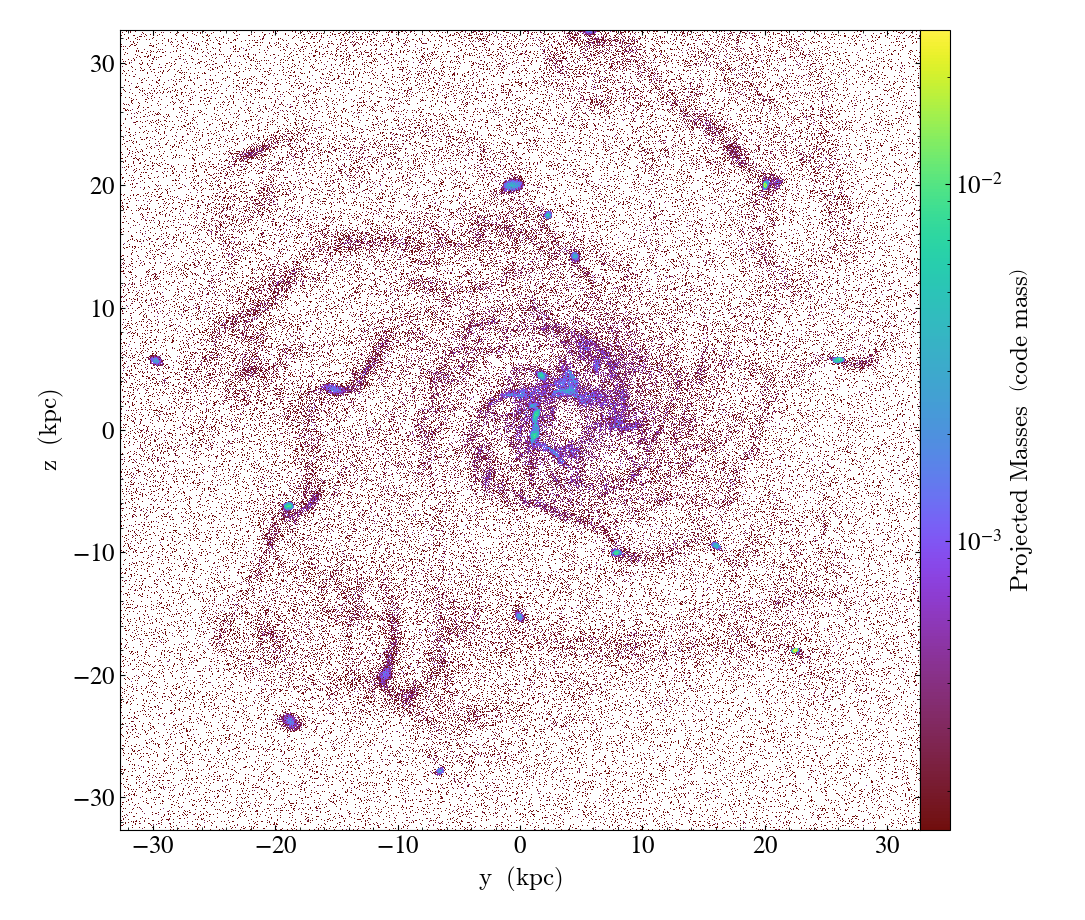

In [36]:
from yt.units import kpc
p = yt.ParticlePlot(ds, ("PartType0", "particle_position_y"), ("PartType0", "particle_position_z"), ("PartType0", "Masses"), center='max')
#p.pan_rel((0.105,0.235))
p.pan((-20*kpc, -20*kpc))
#slc.pan((4000*kpc, 6000*kpc))
p.zoom(400)
p.show()

In [2]:

ds = yt.load('/media/lorenzong/Data1/simba_hig_res/snap_m25n512_044.hdf5')


yt : [INFO     ] 2024-07-18 17:05:54,225 Calculating time from 1.736e-01 to be 3.986e+16 seconds
yt : [INFO     ] 2024-07-18 17:05:54,225 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-07-18 17:05:54,264 Parameters: current_time              = 3.9858341761438936e+16 s
yt : [INFO     ] 2024-07-18 17:05:54,265 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-18 17:05:54,265 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-18 17:05:54,266 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-07-18 17:05:54,266 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-07-18 17:05:54,266 Parameters: current_redshift          = 4.761397524829645
yt : [INFO     ] 2024-07-18 17:05:54,266 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-07-18 17:05:54,267 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-07-18 17:05:54,267 Parameters: omega_radiation     

In [ ]:
p = yt.ParticlePlot(ds, ("PartType0", "particle_position_x"), ("PartType0", "particle_position_y"), ("PartType0", "Dust_Masses"), center='max')
#p.set_unit(("PartType0", "Dust_Masses"), "Msun")


yt : [INFO     ] 2024-07-18 17:07:39,024 max value is 5.05491e-20 at 11572.0117187500000000 17156.4570312500000000 18327.7421875000000000
yt : [INFO     ] 2024-07-18 17:07:39,025 xlim = -927.988281 24072.011719
yt : [INFO     ] 2024-07-18 17:07:39,025 ylim = 4656.457031 29656.457031
yt : [INFO     ] 2024-07-18 17:07:39,026 xlim = -927.988281 24072.011719
yt : [INFO     ] 2024-07-18 17:07:39,026 ylim = 4656.457031 29656.457031
yt : [INFO     ] 2024-07-18 17:07:39,027 Splatting (('PartType0', 'Dust_Masses')) onto a 800 by 800 mesh using method 'ngp'


In [ ]:
p.pan_rel((0.105,0.235))
#slc.pan((4000*kpc, 6000*kpc))
p.zoom(60)
p.show()